In [21]:
import pandas as pd
from pathlib import Path

DATA_FOLDER = Path('../data/results/')

lr_file = DATA_FOLDER / Path('linear_regression_predictions.csv')
lstm_file = DATA_FOLDER / Path('LSTM_store_sales.csv')
var_file = DATA_FOLDER / Path('var_sales_forecast.csv')
ground_file = DATA_FOLDER / Path('ground_truth.csv')

lr_results = pd.read_csv(lr_file, index_col=0, parse_dates=True)
lstm_results = pd.read_csv(lstm_file, index_col=0, parse_dates=True)
var_results = pd.read_csv(var_file, index_col=0, parse_dates=True)
ground_truth = pd.read_csv(ground_file, index_col=0, parse_dates=True)

In [22]:
from sklearn.metrics import mean_squared_error

STATES = ['CA', 'WI', 'TX']
STORES = [1, 2, 3, 4]

lr_mse = {}
lr_rmse = {}
lstm_mse = {}
lstm_rmse = {}
var_mse = {}
var_rmse = {}

for state in STATES:
    for store in STORES:
        try:
            lr_mse[f'{state}_{store}'] = mean_squared_error(ground_truth[f'{state}_{store}'], lr_results[f'{state}_{store}'])
            lr_rmse[f'{state}_{store}'] = lr_mse[f'{state}_{store}'] ** 0.5
            lstm_mse[f'{state}_{store}'] = mean_squared_error(ground_truth[f'{state}_{store}'], lstm_results[f'{state}_{store}'])
            lstm_rmse[f'{state}_{store}'] = lstm_mse[f'{state}_{store}'] ** 0.5
            var_mse[f'{state}_{store}'] = mean_squared_error(ground_truth[f'{state}_{store}'], var_results[f'{state}_{store}'])
            var_rmse[f'{state}_{store}'] = var_mse[f'{state}_{store}'] ** 0.5
        except KeyError:
            pass

df_mse = pd.DataFrame(lr_mse, index=['Linear Regression'])
df_mse = df_mse.append(pd.DataFrame(lstm_mse, index=['LSTM']))
df_mse = df_mse.append(pd.DataFrame(var_mse, index=['Vector Autoregression']))
df_mse.to_csv(DATA_FOLDER / Path('mse_evaluation.csv'))

df_rmse = pd.DataFrame(lr_rmse, index=['Linear Regression'])
df_rmse = df_rmse.append(pd.DataFrame(lstm_rmse, index=['LSTM']))
df_rmse = df_rmse.append(pd.DataFrame(var_rmse, index=['Vector Autoregression']))
df_rmse.to_csv(DATA_FOLDER / Path('rmse_evaluation.csv'))

In [23]:
from sklearn.metrics import r2_score

lr_r2 = {}
lstm_r2 = {}
var_r2 = {}

for state in STATES:
    for store in STORES:
        try:
            lr_r2[f'{state}_{store}'] = r2_score(ground_truth[f'{state}_{store}'], lr_results[f'{state}_{store}'])
            lstm_r2[f'{state}_{store}'] = r2_score(ground_truth[f'{state}_{store}'], lstm_results[f'{state}_{store}'])
            var_r2[f'{state}_{store}'] = r2_score(ground_truth[f'{state}_{store}'], var_results[f'{state}_{store}'])
        except KeyError:
            pass

df_r2 = pd.DataFrame(lr_r2, index=['Linear Regression'])
df_r2 = df_r2.append(pd.DataFrame(lstm_r2, index=['LSTM']))
df_r2 = df_r2.append(pd.DataFrame(var_r2, index=['Vector Autoregression']))
df_r2.to_csv(DATA_FOLDER / Path('r2_evaluation.csv'))

<AxesSubplot:>

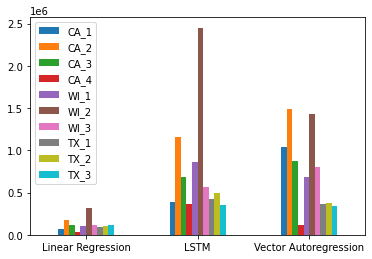

In [26]:
import matplotlib.pyplot as plt

# show bar plot of MSE group by column name
df_mse.plot.bar(rot=0)

<AxesSubplot:>

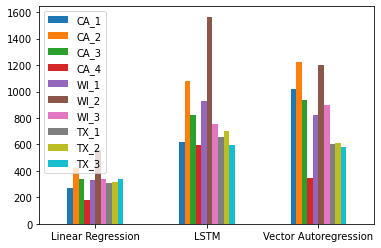

In [27]:
df_rmse.plot.bar(rot=0)

<AxesSubplot:>

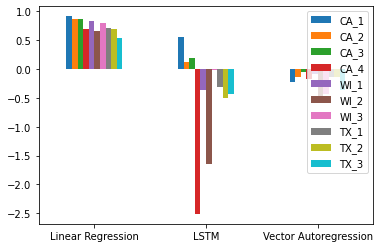

In [28]:
df_r2.plot.bar(rot=0)

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(lr_results.index, lr_results["CA_1"], label = "Linear Regression")
plt.plot(lstm_results.index, lstm_results["CA_1"], label = "LSTM")
plt.plot(var_results.index, var_results["CA_1"], label = "Vector Autoregression")
plt.plot(ground_truth.index, ground_truth["CA_1"], label = "Ground Truth")
plt.legend()
plt.show()